In [397]:
import pandas as pd
import numpy as np
%matplotlib inline

In [760]:
brain_wong_train = pd.read_csv('./Train/Train.csv', index_col='ID')
brain_wong_test = pd.read_csv('./Test/Test.csv', index_col='ID')

In [860]:
%run scripts/preprocess.py
%run scripts/transform.py
%run scripts/model.py

In [762]:
def f(x):
    col_dict = {
        'HXYB': 'urban',
        'HXYC': 'urban',
        'HXYD': 'urban',
        'HXYE': 'urban',
        'HXYF': 'suburban',
        'HXFG': 'suburban',
        'HXYH': 'suburban',
        'HXYI': 'suburban',
        'HXYJ': 'rural',
        'HXYK': 'rural',
        'HXYL': 'rural',
        'HXYM': 'other',
        'HXYN': 'other',
        'HXYO': 'other',
    }
    
    return col_dict[x]
    
brain_wong_train['Var8'] = brain_wong_train['Var8'].map(f)
brain_wong_test['Var8'] = brain_wong_test['Var8'].map(f)

In [763]:
transform_train = Transform(brain_wong_train)
transform_test = Transform(brain_wong_test)

In [764]:
brain_wong_train.columns = transform_train.lowercase_columns()
brain_wong_test.columns = transform_test.lowercase_columns()

In [765]:
brain_wong_train = transform_train.fill_missing_values()
brain_wong_test = transform_test.fill_missing_values()

['institute_country', 'secondary_subject', 'secondary_area']
['institute_zip', 'institute_country', 'secondary_subject', 'secondary_area']


In [766]:
preprocess = Preprocessing(brain_wong_train, brain_wong_test)

In [767]:
brain_wong_train, brain_wong_test = preprocess.fit_transform()

In [861]:
model = Model(brain_wong_train, brain_wong_test)

In [769]:
# model.cross_validation()

In [414]:
# model.test_scores

[  1.14683347e+05   1.05441353e+05   4.89094953e+04   5.87461804e+04
   1.96321351e+04   1.01217328e+05   1.56219395e+05   1.66497523e+04
   2.59203868e+03   2.12057876e+03   1.48044843e+03   3.23196043e+03
   1.52632934e+02   1.16339280e+04   3.74860232e+03   2.97284135e+03
   2.93447254e+05   2.62122058e+04   6.63582972e+04   1.27058016e+04
   5.78028722e+05   2.28326351e+05   7.35802944e+03   1.43128034e+05
   1.02602288e+05]


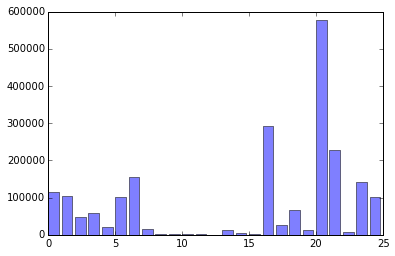

In [415]:
model.feature_importance()

In [831]:
model.performance()

In [832]:
model.training_score

206.21930080753802

In [833]:
model.test_score

686.89713210884258

In [859]:
model.ensemble()

GBR training score  483.588536007
RF training score  202.173635355
ETR training score  17.4955983879
GBR test score  670.409764015
Rf score  688.129760787
ETR test score  697.545167427
Correlation between predictions of these two models                  etr_test_score  gbr_test_score  rf_test_score
etr_test_score        1.000000        0.643996       0.770332
gbr_test_score        0.643996        1.000000       0.747484
rf_test_score         0.770332        0.747484       1.000000


In [855]:
model.training_score

334.60497896813689

In [856]:
model.test_score

673.20835932844125

In [ ]:
predictions = model.make_predictions()

In [842]:
model.create_submission('gbr_rf_ensemble_2.csv', predictions)